In [1]:
import numpy as np
import json
import os
import pandas as pd
from matplotlib import pyplot as plt
import sys
from scipy import stats, io
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import metrics


BIDS_path= "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\\"
subjects = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']


In [2]:
df_all = pd.read_csv("df_all.csv", index_col=0)
df_best_ECOG_CON = pd.read_csv("df_ECOG_CON.csv", index_col=0)
df_best_ECOG_IPS = pd.read_csv("df_ECOG_IPS.csv", index_col=0)
df_best_STN_CON = pd.read_csv("df_STN_CON.csv", index_col=0)
df_best_STN_IPS = pd.read_csv("df_STN_IPS.csv", index_col=0)

In [3]:
df_best_ECOG_CON

,ch,dist_con,dist_ips,loc,r2_con,r2_ips,sess_,sub,x,y,z,b_peak,UPDRS_rigidity_upper_extrimity_contralateral,UPDRS_rigidity_upper_extrimity_ipsilateral,UPDRS_combined_akinesia_rigidty_contalateral,UPDRS_combined_akinesia_rigidty_ipsilateral,UPDRS_total
0,ECOG_RIGHT_1,12.718657,12.718657,ECOG,0.711734,0.415419,right,0,40.159894,-37.315930,64.311716,4.356077,1,1,6.0,7,28
1,ECOG_RIGHT_19,5.723889,5.723889,ECOG,0.644271,0.161562,right,1,36.636654,-26.376084,69.544121,2.586582,2,1,7.0,5,27
2,ECOG_LEFT_6,52.237247,52.237247,ECOG,0.507876,0.219775,left,1,-37.145195,-34.718589,115.325022,2.267635,1,2,5.0,7,27
3,ECOG_RIGHT_4,11.855356,11.855356,ECOG,0.163217,0.396743,right,4,48.707572,-23.266782,63.308498,3.046997,2,2,12.0,13,33
4,ECOG_LEFT_6,26.297526,26.297526,ECOG,0.019248,0.294063,left,4,-30.280979,-0.242780,69.787460,3.228846,2,2,13.0,12,33
5,ECOG_RIGHT_5,27.893679,27.893679,ECOG,0.068220,0.000000,right,5,59.336262,-13.182007,52.189677,2.405929,1,2,3.0,8,31
6,ECOG_LEFT_5,30.486143,30.486143,ECOG,0.372053,0.195019,left,5,-43.903367,-54.693468,64.215332,3.617876,2,1,8.0,3,31
7,ECOG_RIGHT_18,16.440420,16.440420,ECOG,0.365936,0.020095,right,6,35.443243,-9.051098,67.673748,3.864178,1,3,8.0,13,32
8,ECOG_LEFT_29,28.211567,28.211567,ECOG,0.361942,0.043398,left,6,-61.086246,-24.967767,49.311766,3.462273,3,1,15.0,7,32
9,ECOG_LEFT_2,10.126506,10.126506,ECOG,0.041650,0.000000,left,7,-36.709111,-14.916705,64.888071,2.574121,3,2,16.0,12,52


### beta peak

In [ ]:
# for beta peaks there is always: 
# ECOG CON: best channel, mean ch. per patient, 

In [8]:
# best channel
df_here = df_best_ECOG_CON
df_here["r2_conZ"] = np.arctanh(df_here["r2_con"])
model = smf.ols("r2_conZ~b_peak", data=df_here)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                r2_conZ   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     5.608
Date:                Fri, 04 Sep 2020   Prob (F-statistic):             0.0328
Time:                        07:38:19   Log-Likelihood:                 1.4105
No. Observations:                  16   AIC:                             1.179
Df Residuals:                      14   BIC:                             2.724
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0951      0.179     -0.530      0.6

In [17]:
# mean of con. and ips. best ch. 
df_here = df_best_ECOG_CON
df_here["r2"] = np.mean(np.concatenate((np.arctanh(np.expand_dims(df_best_ECOG_CON["r2_con"], axis=1)), \
                np.arctanh(np.expand_dims(df_best_ECOG_IPS["r2_ips"], axis=1))), axis=1), axis=1)
model = smf.ols("r2~b_peak", data=df_here)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     9.279
Date:                Fri, 04 Sep 2020   Prob (F-statistic):            0.00872
Time:                        07:45:26   Log-Likelihood:                 9.2567
No. Observations:                  16   AIC:                            -14.51
Df Residuals:                      14   BIC:                            -12.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0987      0.110     -0.898      0.3

C:\Users\ICN_admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


Text(0.5, 1.0, '$\\rho$=0.55 p=0.009\nSum of Beta Peaks No Movement periodic fit\n $R^2$: Mean of Con. and Ips. best performances')

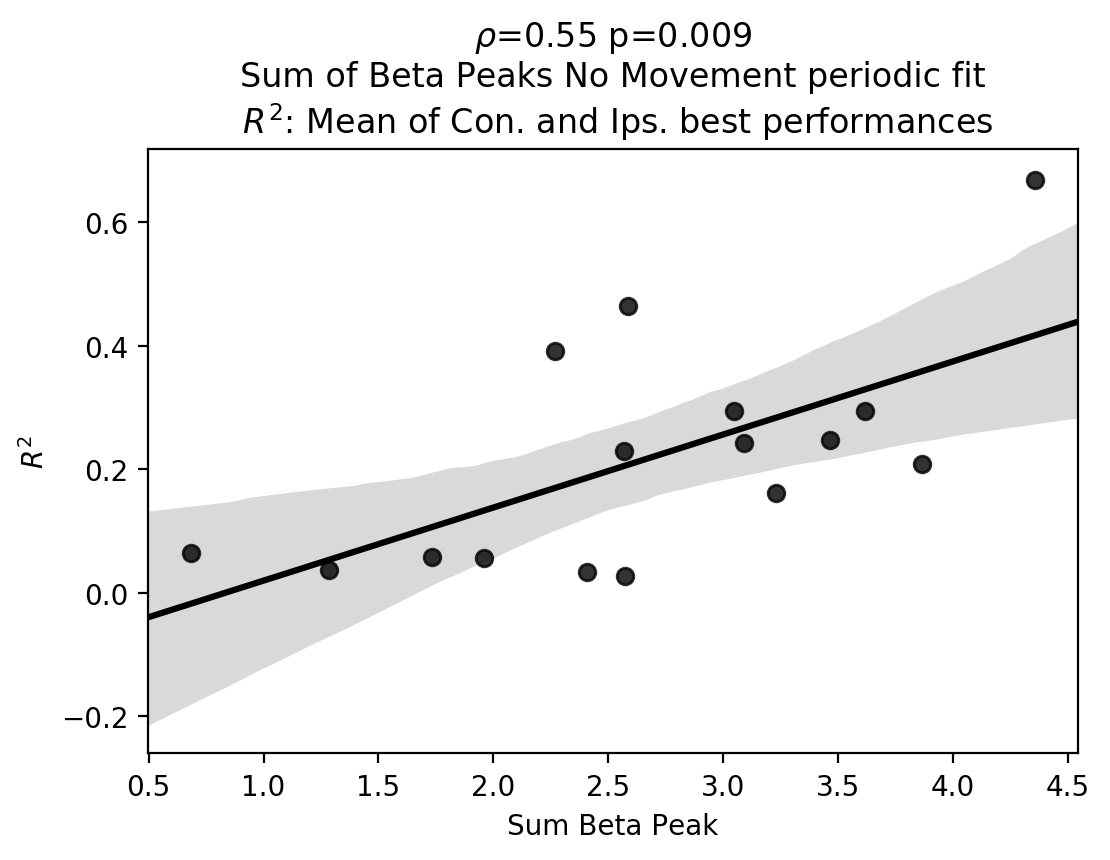

In [22]:
rho_ = np.round(stats.spearmanr(df_here["r2"], df_here["b_peak"])[0], 2)
p_val = np.round(results.pvalues["b_peak"],3)
plt.figure(figsize=(6,4), dpi=200)
sns.regplot(x="b_peak", y="r2", data=df_here, color="black")
plt.xlabel("Sum Beta Peak")
plt.ylabel(r"$R^2$")
plt.title(r"$\rho$"+"="+str(rho_)+" p="+str(p_val)+"\nSum of Beta Peaks No Movement periodic fit\n "+\
          r"$R^2$"+": Mean of Con. and Ips. best performances")

In [9]:
# mean of mean ch. con and ips. 
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
pred_var = "b_peak"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"]))).mean())
    pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    #pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
    #                           df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
    
df_comp = pd.DataFrame()
df_comp["r2"] = np.array(per_)
df_comp["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp)
results = model.fit()
print(stats.spearmanr(df_comp["r2"], df_comp["pred"]))
print(results.summary())

SpearmanrResult(correlation=0.6545454545454547, pvalue=0.028864598957001886)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     4.220
Date:                Fri, 04 Sep 2020   Prob (F-statistic):             0.0701
Time:                        07:39:10   Log-Likelihood:                 7.7355
No. Observations:                  11   AIC:                            -11.47
Df Residuals:                       9   BIC:                            -10.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

C:\Users\ICN_admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


### best ch combine

In [7]:
df_here = df_best_ECOG_CON
df_here["r2_conZ"] = np.arctanh(df_here["r2_con"])
model = smf.ols("r2_conZ~b_peak", data=df_here)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                r2_conZ   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     5.608
Date:                Fri, 04 Sep 2020   Prob (F-statistic):             0.0328
Time:                        07:36:00   Log-Likelihood:                 1.4105
No. Observations:                  16   AIC:                             1.179
Df Residuals:                      14   BIC:                             2.724
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0951      0.179     -0.530      0.6

In [52]:
per_ = []
pred_ = []
pred_var = "UPDRS_total"
perf_var = "r2_con"
for sub in subjects:
    sub_ = int(sub)
    per_.append(df_here[df_here["sub"] == sub_][perf_var].mean())
    pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    
df_comp = pd.DataFrame()
df_comp["r2"] = np.arctanh(np.array(per_))
df_comp["pred"] = pred_
df_comp["dist"] = df_best_ECOG_CON["dist_con"]
df_comp["b_peak"] = df_best_ECOG_CON["b_peak"]
model = smf.ols("r2~pred + dist + b_peak", data=df_comp)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     1.812
Date:                Thu, 03 Sep 2020   Prob (F-statistic):              0.233
Time:                        15:38:51   Log-Likelihood:                 2.1088
No. Observations:                  11   AIC:                             3.782
Df Residuals:                       7   BIC:                             5.374
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0600      0.470     -0.128      0.9

C:\Users\ICN_admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


### get mean results 

In [118]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
pred_var = "UPDRS_total"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"]))).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
                               df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
    
df_comp = pd.DataFrame()
df_comp["r2"] = np.array(per_)
df_comp["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp)
results = model.fit()
print(stats.spearmanr(df_comp["r2"], df_comp["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.6131617779732899, pvalue=0.04485069721774724)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     9.150
Date:                Thu, 03 Sep 2020   Prob (F-statistic):             0.0144
Time:                        16:44:27   Log-Likelihood:                 9.4786
No. Observations:                  11   AIC:                            -14.96
Df Residuals:                       9   BIC:                            -14.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

C:\Users\ICN_admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Text(0.5, 1.0, '$\\rho$=-0.61 p=0.01\nUPDRS: Mean of Con. Ips. UPDRS Upper Rigidity \n $R^2$: Mean of Con. and Ips. mean performances ')

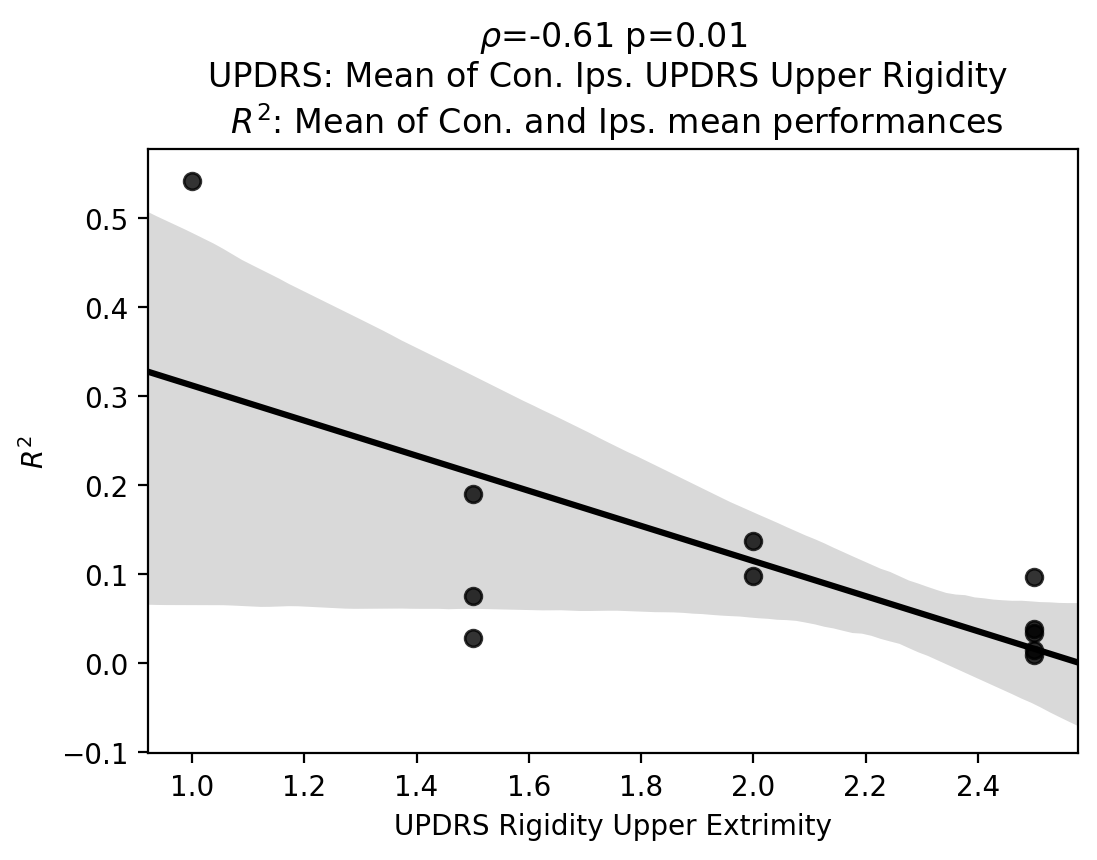

In [125]:
plt.figure(figsize=(6,4), dpi=200)
sns.regplot(x="pred", y="r2", data=df_comp, color="black")
plt.xlabel("UPDRS Rigidity Upper Extrimity")
plt.ylabel(r"$R^2$")
plt.title(r"$\rho$"+"=-0.61 p=0.01\nUPDRS: Mean of Con. Ips. UPDRS Upper Rigidity \n "+\
          r"$R^2$"+": Mean of Con. and Ips. mean performances ")

SpearmanrResult(correlation=-0.5512542775696283, pvalue=0.07878928423361271)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     3.200
Date:                Thu, 03 Sep 2020   Prob (F-statistic):              0.107
Time:                        17:11:23   Log-Likelihood:                 7.2938
No. Observations:                  11   AIC:                            -10.59
Df Residuals:                       9   BIC:                            -9.792
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

Text(0.5, 1.0, '$\\rho$=-0.55 p=0.11\nUPDRS total\n $R^2$: Mean of Con. and Ips. mean performances ')

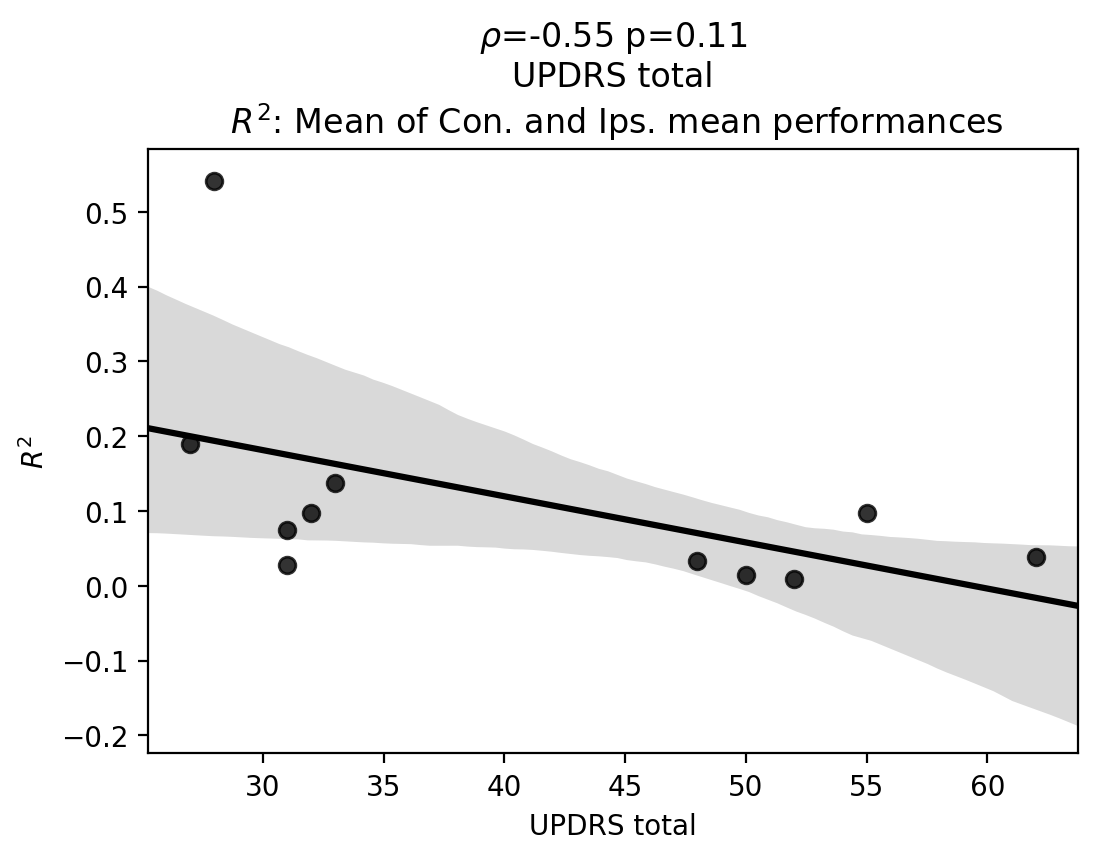

In [127]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
pred_var = "UPDRS_total"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"]))).mean())
    pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    #pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
    #                           df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
    
df_comp = pd.DataFrame()
df_comp["r2"] = np.array(per_)
df_comp["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp)
results = model.fit()
print(stats.spearmanr(df_comp["r2"], df_comp["pred"]))
print(results.summary())

plt.figure(figsize=(6,4), dpi=200)
sns.regplot(x="pred", y="r2", data=df_comp, color="black")
plt.xlabel("UPDRS total")
plt.ylabel(r"$R^2$")
plt.title(r"$\rho$"+"=-0.55 p=0.11\nUPDRS total\n "+r"$R^2$"+": Mean of Con. and Ips. mean performances ")

### normal LM test

In [19]:
import statsmodels.formula.api as smf

In [82]:
df_here = df_best_ECOG_CON
df_here["r2_Z"] = (np.arctanh(df_best_ECOG_CON["r2_con"]) + np.arctanh(df_best_ECOG_IPS["r2_ips"]))/2
model = smf.ols("r2_Z~UPDRS_total", data=df_here)
results = model.fit()
print(stats.spearmanr(df_here["r2_Z"], df_here["UPDRS_total"]))

print(results.summary())

SpearmanrResult(correlation=-0.48965354255503424, pvalue=0.05420762995402972)
                            OLS Regression Results                            
Dep. Variable:                   r2_Z   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     4.371
Date:                Thu, 03 Sep 2020   Prob (F-statistic):             0.0553
Time:                        16:17:04   Log-Likelihood:                 7.3623
No. Observations:                  16   AIC:                            -10.72
Df Residuals:                      14   BIC:                            -9.179
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [53]:
df_here = df_best_ECOG_IPS
df_here["r2_ipsZ"] = np.arctanh(df_here["r2_ips"])
model = smf.ols("r2_ipsZ~UPDRS_total", data=df_here)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                r2_ipsZ   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     6.511
Date:                Thu, 03 Sep 2020   Prob (F-statistic):             0.0230
Time:                        15:54:13   Log-Likelihood:                 11.119
No. Observations:                  16   AIC:                            -18.24
Df Residuals:                      14   BIC:                            -16.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3923      0.108      3.623      

C:\Users\ICN_admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


### test a MLM

In [3]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]

df_here["r2_conZ"] = np.arctanh(df_all["r2_con"])
df_here["r2_ipsZ"] = np.arctanh(df_all["r2_ips"])

md = smf.mixedlm("r2_conZ ~ dist_con", data=df_here, groups=df_here["sub"])
mdf_con = md.fit()
sum_ = mdf_con.summary()
print("con")
print(sum_)

md = smf.mixedlm("r2_ipsZ ~ dist_ips", data=df_here, groups=df_here["sub"])
mdf_ips = md.fit()
sum_ = mdf_ips.summary()
print("ips")
print(sum_)

C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


con
        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r2_conZ 
No. Observations: 200     Method:             REML    
No. Groups:       11      Scale:              0.0150  
Min. group size:  6       Likelihood:         109.7659
Max. group size:  64      Converged:          Yes     
Mean group size:  18.2                                
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.197    0.062  3.169 0.002  0.075  0.319
dist_con    -0.002    0.000 -3.729 0.000 -0.003 -0.001
Group Var    0.039    0.157                           

ips
        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r2_ipsZ 
No. Observations: 200     Method:             REML    
No. Groups:       11      Scale:              0.0025  
Min. group size:  6       Likelihood:         284.2192
Max. group size:  6

In [4]:
mdf_con.pvalues["dist_con"]

0.00019235870805420785

In [5]:
stats.spearmanr(df_here["r2_conZ"], mdf_con.fittedvalues)

SpearmanrResult(correlation=0.7006752420140384, pvalue=7.498214025139026e-31)

In [7]:
metrics.r2_score(df_here["r2_conZ"], mdf_con.fittedvalues)

0.5679392368741354

In [6]:
stats.spearmanr(df_here["r2_ipsZ"], mdf_ips.fittedvalues)

SpearmanrResult(correlation=0.7933177216466125, pvalue=1.5115755411586097e-44)

Text(0.5, 1.0, 'ECOG Mixed Linear Model distance motor area\nDistance fixed effect con. p<0.001, ips. p=0.12')

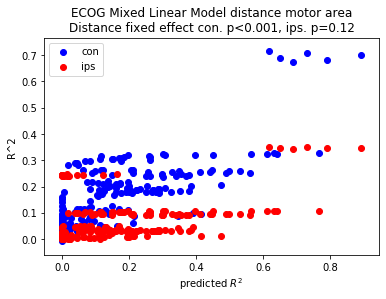

In [163]:
plt.scatter(df_here["r2_conZ"], mdf_con.fittedvalues, color="blue", label="con")
plt.scatter(df_here["r2_conZ"], mdf_ips.fittedvalues, color="red", label="ips")
plt.xlabel("predicted "+r"$R^2$")
plt.ylabel(r"R^2")
plt.legend()
plt.title("ECOG Mixed Linear Model distance motor area\n"+"Distance fixed effect con. p<0.001, ips. p=0.12")

In [164]:
df_here = df_all[df_all["loc"].str.contains("STN")]

df_here["r2_conZ"] = np.arctanh(df_all["r2_con"])
df_here["r2_ipsZ"] = np.arctanh(df_all["r2_ips"])

md = smf.mixedlm("r2_conZ ~ dist_con", data=df_here, groups=df_here["sub"])
mdf_con = md.fit()
sum_ = mdf_con.summary()
print("con")
print(sum_)

md = smf.mixedlm("r2_ipsZ ~ dist_ips", data=df_here, groups=df_here["sub"])
mdf_ips = md.fit()
sum_ = mdf_ips.summary()
print("ips")
print(sum_)

con
        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r2_conZ
No. Observations: 48      Method:             REML   
No. Groups:       11      Scale:              0.0019 
Min. group size:  3       Likelihood:         51.9858
Max. group size:  6       Converged:          Yes    
Mean group size:  4.4                                
-----------------------------------------------------
           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept   0.106    0.063  1.670 0.095 -0.018  0.230
dist_con   -0.009    0.005 -1.731 0.083 -0.020  0.001
Group Var   0.040    0.467                           

ips
        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r2_ipsZ
No. Observations: 48      Method:             REML   
No. Groups:       11      Scale:              0.0036 
Min. group size:  3       Likelihood:         59.5250
Max. group size:  6       Converged

C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ICN_admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_

Text(0.5, 1.0, 'STN Mixed Linear Model distance motor area\nDistance fixed effect con. p=0.083, ips. p=0.107')

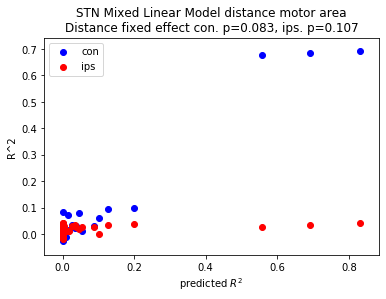

In [166]:
plt.scatter(df_here["r2_conZ"], mdf_con.fittedvalues, color="blue", label="con")
plt.scatter(df_here["r2_conZ"], mdf_ips.fittedvalues, color="red", label="ips")
plt.xlabel("predicted "+r"$R^2$")
plt.ylabel(r"R^2")
plt.legend()
plt.title("STN Mixed Linear Model distance motor area\n"+"Distance fixed effect con. p=0.083, ips. p=0.107")

Text(0.5, 0, 'channel')

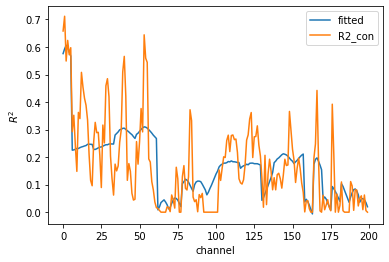

In [53]:
plt.plot(mdf.fittedvalues, label="fitted")
plt.plot(df_here["r2_con"], label="R2_con")
plt.legend()
plt.ylabel(r"$R^2$")
plt.xlabel("channel")

In [58]:
stats.spearmanr(df_here["r2_con"], mdf.fittedvalues)

SpearmanrResult(correlation=0.7013615123368585, pvalue=6.211521430934105e-31)

Text(0.5, 0, 'channel')

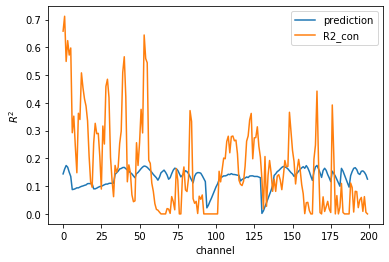

In [59]:
plt.plot(mdf.predict(df_here["dist_con"]), label="prediction")
plt.plot(df_here["r2_con"], label="R2_con")
plt.legend()
plt.ylabel(r"$R^2$")
plt.xlabel("channel")

In [60]:
stats.spearmanr(df_here["r2_con"], mdf.predict(df_here["dist_con"]))

SpearmanrResult(correlation=0.10609483904244672, pvalue=0.13485540694739218)

In [56]:
mdf.pvalues

Intercept    0.000631
dist_con     0.000142
Group Var    0.040856
dtype: float64

In [5]:
def plot_reg_lines(x_con = "dist_con",y_con = "r2_con",x_ips = "dist_ips",y_ips = "r2_ips",x_label = "distance to motor area",y_label = r'$R^2$'):
    plt.figure(figsize=(8,8), dpi=100)
    plt.subplot(221)
    sns.regplot(x=x_con, y=y_con, data=df_best_ECOG_CON, label="CON", color="red")
    sns.regplot(x=x_ips, y=y_ips, data=df_best_ECOG_IPS, label="IPS", color="blue")
    plt.legend()
    plt.ylabel(y_label)
    plt.xlabel(x_label); 
    x_con_ = df_best_ECOG_CON[x_con]; y_con_ = df_best_ECOG_CON[y_con];
    x_ips_ = df_best_ECOG_IPS[x_ips]; y_ips_ = df_best_ECOG_IPS[y_ips];
    mod = sm.OLS(y_con_,x_con_); fii = mod.fit(); p_values_con = fii.summary2().tables[1]['P>|t|'][0]
    mod = sm.OLS(y_ips_,x_ips_); fii = mod.fit(); p_values_ips = fii.summary2().tables[1]['P>|t|'][0]
    
    p_values_con=stats.spearmanr(x_con_, y_con_)[1]; rho_con= stats.spearmanr(x_con_, y_con_)[0]
    p_values_ips=stats.spearmanr(x_ips_, y_ips_)[1]; rho_ips= stats.spearmanr(x_ips_, y_ips_)[0]
    plt.title('ECOG best ch\n con. p='+str(np.round(p_values_con,2))+ " "+r"$\rho$"+"="+\
              str(np.round(rho_con,3))+ \
             "\nips. p="+str(np.round(p_values_ips,2))+ \
             " "+r"$\rho$"+"="+str(np.round(rho_ips,2)))
    
    plt.subplot(222)
    sns.regplot(x=x_con, y=y_con, data=df_best_STN_CON, label="CON", color="red")
    sns.regplot(x=x_ips, y=y_ips, data=df_best_STN_IPS, label="IPS", color="blue")
    plt.legend()
    plt.ylabel(y_label)
    plt.xlabel(x_label); 
    
    x_con_ = df_best_STN_CON[x_con]; y_con_ = df_best_STN_CON[y_con];
    x_ips_ = df_best_STN_IPS[x_ips]; y_ips_ = df_best_STN_IPS[y_ips];
    mod = sm.OLS(y_con_,x_con_); fii = mod.fit(); p_values_con = fii.summary2().tables[1]['P>|t|'][0]
    mod = sm.OLS(y_ips_,x_ips_); fii = mod.fit(); p_values_ips = fii.summary2().tables[1]['P>|t|'][0]
    p_values_con=stats.spearmanr(x_con_, y_con_)[1]; rho_con= stats.spearmanr(x_con_, y_con_)[0]
    p_values_ips=stats.spearmanr(x_ips_, y_ips_)[1]; rho_ips= stats.spearmanr(x_ips_, y_ips_)[0]
    plt.title('STN best ch\n con. p='+str(np.round(p_values_con,2))+ " "+r"$\rho$"+"="+\
              str(np.round(rho_con,3))+ \
             "\nips. p="+str(np.round(p_values_ips,2))+ \
             " "+r"$\rho$"+"="+str(np.round(rho_ips,2)))
    
    plt.subplot(223)
    sns.regplot(x=x_con, y=y_con, data=df_all[(df_all["loc"] == "ECOG")], label="CON", color="red")
    sns.regplot(x=x_ips, y=y_ips, data=df_all[(df_all["loc"] == "ECOG")], label="IPS", color="blue")
    plt.legend()
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    x_con_ = df_all[(df_all["loc"] == "ECOG")][x_con]; y_con_ = df_all[(df_all["loc"] == "ECOG")][y_con];
    x_ips_ = df_all[(df_all["loc"] == "ECOG")][x_ips]; y_ips_ = df_all[(df_all["loc"] == "ECOG")][y_ips];
    mod = sm.OLS(y_con_,x_con_); fii = mod.fit(); p_values_con = fii.summary2().tables[1]['P>|t|'][0]
    mod = sm.OLS(y_ips_,x_ips_); fii = mod.fit(); p_values_ips = fii.summary2().tables[1]['P>|t|'][0]
    p_values_con=stats.spearmanr(x_con_, y_con_)[1]; rho_con= stats.spearmanr(x_con_, y_con_)[0]
    p_values_ips=stats.spearmanr(x_ips_, y_ips_)[1]; rho_ips= stats.spearmanr(x_ips_, y_ips_)[0]
    plt.title('ECOG all ch\n con. p='+str(np.round(p_values_con,2))+ " "+r"$\rho$"+"="+\
              str(np.round(rho_con,3))+ \
             "\nips. p="+str(np.round(p_values_ips,2))+ \
             " "+r"$\rho$"+"="+str(np.round(rho_ips,2)))
    
    plt.subplot(224)
    sns.regplot(x=x_con, y=y_con, data=df_all[(df_all["loc"] == "STN")], label="CON", color="red")
    sns.regplot(x=x_ips, y=y_ips, data=df_all[(df_all["loc"] == "STN")], label="IPS", color="blue")
    plt.legend()
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    x_con_ = df_all[(df_all["loc"] == "STN")][x_con]; y_con_ = df_all[(df_all["loc"] == "STN")][y_con];
    x_ips_ = df_all[(df_all["loc"] == "STN")][x_ips]; y_ips_ = df_all[(df_all["loc"] == "STN")][y_ips];
    mod = sm.OLS(y_con_,x_con_); fii = mod.fit(); p_values_con = fii.summary2().tables[1]['P>|t|'][0]
    mod = sm.OLS(y_ips_,x_ips_); fii = mod.fit(); p_values_ips = fii.summary2().tables[1]['P>|t|'][0]
    p_values_con=stats.spearmanr(x_con_, y_con_)[1]; rho_con= stats.spearmanr(x_con_, y_con_)[0]
    p_values_ips=stats.spearmanr(x_ips_, y_ips_)[1]; rho_ips= stats.spearmanr(x_ips_, y_ips_)[0]
    plt.title('STN all ch\n con. p='+str(np.round(p_values_con,2))+ " "+r"$\rho$"+"="+\
              str(np.round(rho_con,3))+ \
             "\nips. p="+str(np.round(p_values_ips,2))+ \
             " "+r"$\rho$"+"="+str(np.round(rho_ips,2)))
    plt.tight_layout()

In [65]:
def plot_reg_lines_mlm(x_con = "dist_con",y_con = "r2_con",x_ips = "dist_ips",y_ips = "r2_ips",x_label = "distance to motor area",y_label = r'$R^2$'):
    plt.figure(figsize=(8,8), dpi=100)
    plt.subplot(221)
    sns.regplot(x=x_con, y=y_con, data=df_best_ECOG_CON, label="CON", color="red")
    sns.regplot(x=x_ips, y=y_ips, data=df_best_ECOG_IPS, label="IPS", color="blue")
    plt.legend()
    plt.ylabel(y_label)
    plt.xlabel(x_label); 
    x_con_ = df_best_ECOG_CON[x_con]; y_con_ = df_best_ECOG_CON[y_con];
    x_ips_ = df_best_ECOG_IPS[x_ips]; y_ips_ = df_best_ECOG_IPS[y_ips];
    #mod = sm.OLS(y_con_,x_con_); fii = mod.fit(); p_values_con = fii.summary2().tables[1]['P>|t|'][0]
    #mod = sm.OLS(y_ips_,x_ips_); fii = mod.fit(); p_values_ips = fii.summary2().tables[1]['P>|t|'][0]
    
    p_values_con=stats.spearmanr(x_con_, y_con_)[1]; rho_con= stats.spearmanr(x_con_, y_con_)[0]
    p_values_ips=stats.spearmanr(x_ips_, y_ips_)[1]; rho_ips= stats.spearmanr(x_ips_, y_ips_)[0]
    plt.title('ECOG best ch\n con. p='+str(np.round(p_values_con,2))+ " "+r"$\rho$"+"="+\
              str(np.round(rho_con,3))+ \
             "\nips. p="+str(np.round(p_values_ips,2))+ \
             " "+r"$\rho$"+"="+str(np.round(rho_ips,2)))
    
    plt.subplot(222)
    sns.regplot(x=x_con, y=y_con, data=df_best_STN_CON, label="CON", color="red")
    sns.regplot(x=x_ips, y=y_ips, data=df_best_STN_IPS, label="IPS", color="blue")
    plt.legend()
    plt.ylabel(y_label)
    plt.xlabel(x_label); 
    
    x_con_ = df_best_STN_CON[x_con]; y_con_ = df_best_STN_CON[y_con];
    x_ips_ = df_best_STN_IPS[x_ips]; y_ips_ = df_best_STN_IPS[y_ips];
    mod = sm.OLS(y_con_,x_con_); fii = mod.fit(); p_values_con = fii.summary2().tables[1]['P>|t|'][0]
    mod = sm.OLS(y_ips_,x_ips_); fii = mod.fit(); p_values_ips = fii.summary2().tables[1]['P>|t|'][0]
    p_values_con=stats.spearmanr(x_con_, y_con_)[1]; rho_con= stats.spearmanr(x_con_, y_con_)[0]
    p_values_ips=stats.spearmanr(x_ips_, y_ips_)[1]; rho_ips= stats.spearmanr(x_ips_, y_ips_)[0]
    plt.title('STN best ch\n con. p='+str(np.round(p_values_con,2))+ " "+r"$\rho$"+"="+\
              str(np.round(rho_con,3))+ \
             "\nips. p="+str(np.round(p_values_ips,2))+ \
             " "+r"$\rho$"+"="+str(np.round(rho_ips,2)))
    
    plt.subplot(223)
    sns.regplot(x=x_con, y=y_con, data=df_all[(df_all["loc"] == "ECOG")], label="CON", color="red")
    sns.regplot(x=x_ips, y=y_ips, data=df_all[(df_all["loc"] == "ECOG")], label="IPS", color="blue")
    plt.legend()
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    x_con_ = df_all[(df_all["loc"] == "ECOG")][x_con]; y_con_ = df_all[(df_all["loc"] == "ECOG")][y_con];
    x_ips_ = df_all[(df_all["loc"] == "ECOG")][x_ips]; y_ips_ = df_all[(df_all["loc"] == "ECOG")][y_ips];
    
    df_here = df_all[(df_all["loc"] == "ECOG")]
    str_ = y_con + " ~ " + x_con
    md = smf.mixedlm(str_, data=df_here, groups=df_here["sub"])
    mdf = md.fit()
    sum_ = mdf.summary()
    rho_con = stats.spearmanr(df_here[y_con], mdf.fittedvalues)[0]
    p_values_con = mdf.pvalues[x_con]
    
    str_ = y_ips + " ~ " + x_ips
    md = smf.mixedlm(str_, data=df_here, groups=df_here["sub"])
    mdf = md.fit()
    sum_ = mdf.summary()
    rho_ips = stats.spearmanr(df_here[y_ips], mdf.fittedvalues)[0]
    p_values_ips = mdf.pvalues[x_ips]
    
    plt.title('ECOG all ch.-Mixed LM\n con. p='+str(np.round(p_values_con,2))+ " "+r"$\rho$"+"="+\
              str(np.round(rho_con,3))+ \
             "\nips. p="+str(np.round(p_values_ips,2))+ \
             " "+r"$\rho$"+"="+str(np.round(rho_ips,2)))
    
    plt.subplot(224)
    sns.regplot(x=x_con, y=y_con, data=df_all[(df_all["loc"] == "STN")], label="CON", color="red")
    sns.regplot(x=x_ips, y=y_ips, data=df_all[(df_all["loc"] == "STN")], label="IPS", color="blue")
    plt.legend()
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    
    df_here = df_all[(df_all["loc"] == "STN")]
    str_ = y_con + " ~ " + x_con
    md = smf.mixedlm(str_, data=df_here, groups=df_here["sub"])
    mdf = md.fit()
    sum_ = mdf.summary()
    rho_con = stats.spearmanr(df_here[y_con], mdf.fittedvalues)[0]
    p_values_con = mdf.pvalues[x_con]
    
    str_ = y_ips + " ~ " + x_ips
    md = smf.mixedlm(str_, data=df_here, groups=df_here["sub"])
    mdf = md.fit()
    sum_ = mdf.summary()
    rho_ips = stats.spearmanr(df_here[y_ips], mdf.fittedvalues)[0]
    p_values_ips = mdf.pvalues[x_ips]
    
    plt.title('STN all ch. Mixed LM\n con. p='+str(np.round(p_values_con,2))+ " "+r"$\rho$"+"="+\
              str(np.round(rho_con,3))+ \
             "\nips. p="+str(np.round(p_values_ips,2))+ \
             " "+r"$\rho$"+"="+str(np.round(rho_ips,2)))
    plt.tight_layout()

C:\Users\ICN_admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
C:\Users\ICN_admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ICN_admin\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
C:\Users\ICN_admin\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


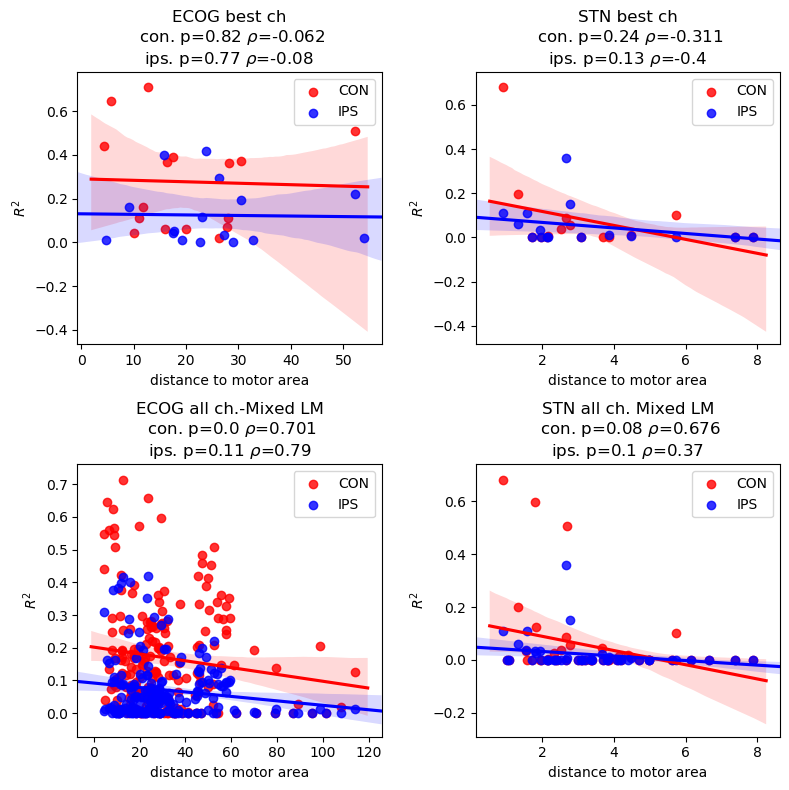

In [66]:
plot_reg_lines_mlm(x_con = "dist_con",y_con = "r2_con",x_ips = "dist_ips",y_ips = "r2_ips",
               x_label = "distance to motor area",y_label = r'$R^2$')

C:\Users\ICN_admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
C:\Users\ICN_admin\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


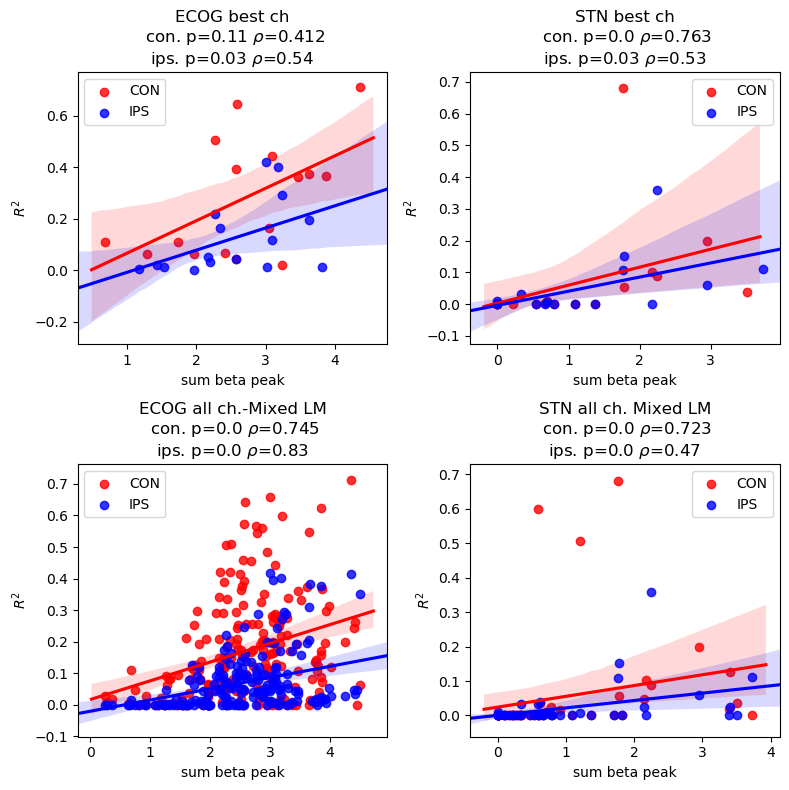

In [67]:
plot_reg_lines_mlm(x_con = "b_peak",y_con = "r2_con",x_ips = "b_peak",y_ips = "r2_ips",
               x_label = "sum beta peak",y_label = r'$R^2$')

C:\Users\ICN_admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
C:\Users\ICN_admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ICN_admin\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
C:\Users\ICN_admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ICN_admin\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
C:\Users\ICN_admin\Anaconda3\lib\site-packa

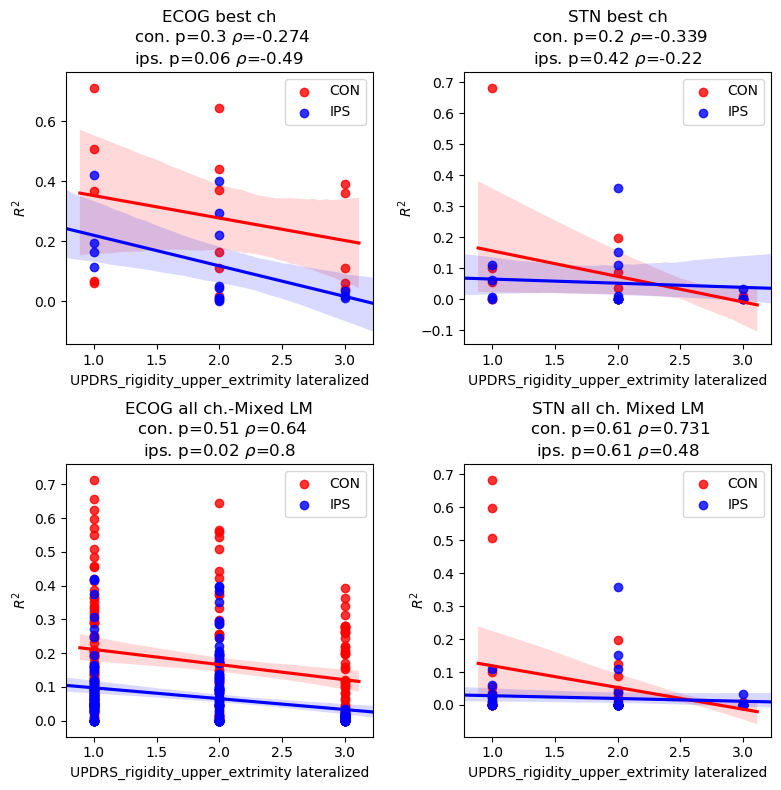

In [68]:
plot_reg_lines_mlm(x_con = "UPDRS_rigidity_upper_extrimity_contralateral",
               y_con = "r2_con",x_ips = "UPDRS_rigidity_upper_extrimity_ipsilateral",
               y_ips = "r2_ips",
               x_label = "UPDRS_rigidity_upper_extrimity lateralized",y_label = r'$R^2$')

C:\Users\ICN_admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
C:\Users\ICN_admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ICN_admin\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
C:\Users\ICN_admin\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


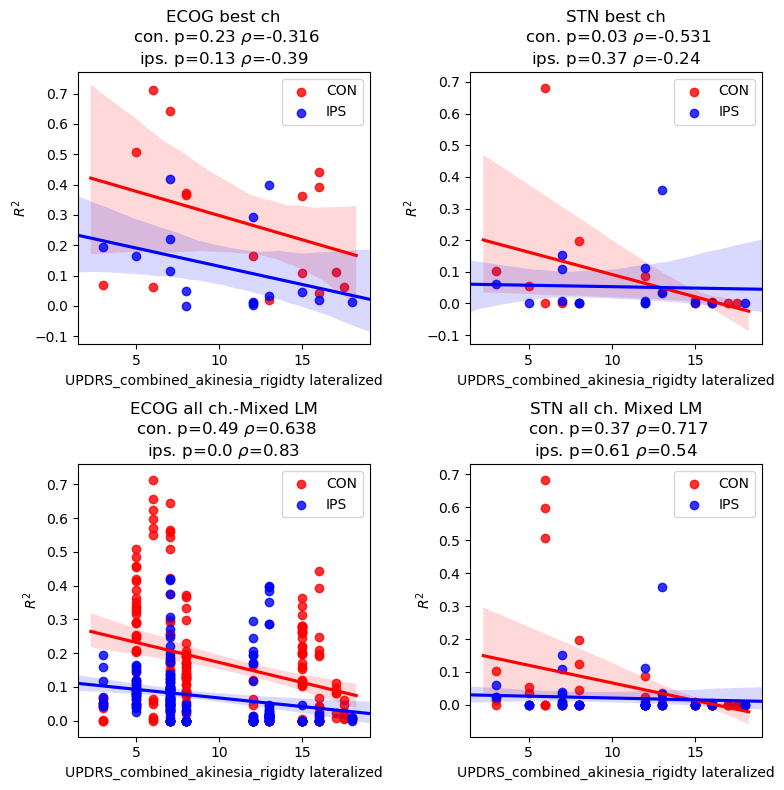

In [69]:
plot_reg_lines_mlm(x_con = "UPDRS_combined_akinesia_rigidty_contalateral",
               y_con = "r2_con",x_ips = "UPDRS_combined_akinesia_rigidty_ipsilateral",
               y_ips = "r2_ips",
               x_label = "UPDRS_combined_akinesia_rigidty lateralized",y_label = r'$R^2$')

C:\Users\ICN_admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


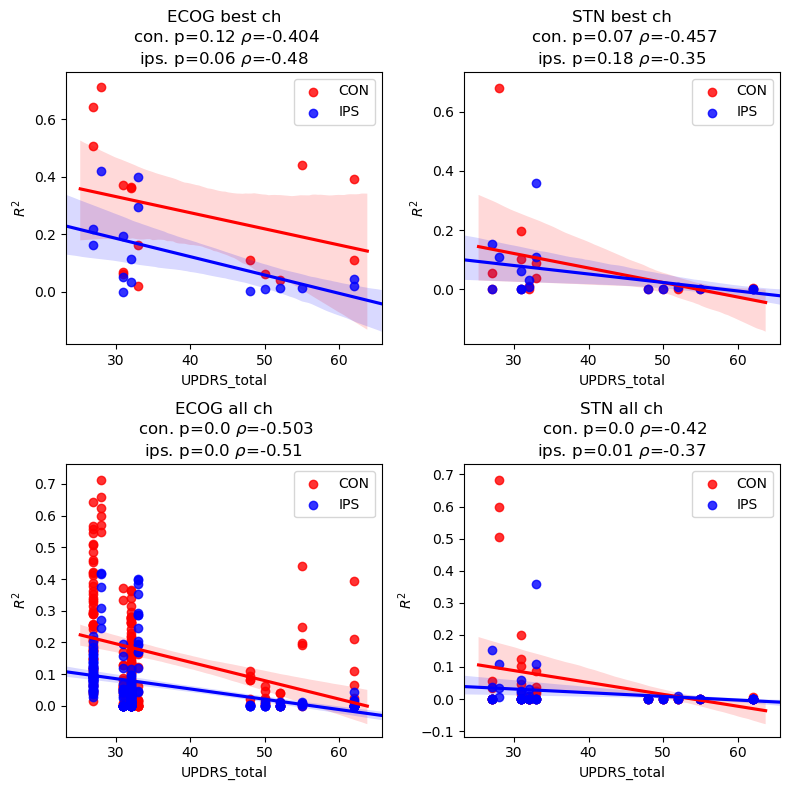

In [70]:
plot_reg_lines(x_con = "UPDRS_total",
               y_con = "r2_con",x_ips = "UPDRS_total",
               y_ips = "r2_ips",
               x_label = "UPDRS_total",y_label = r'$R^2$')